In [1]:
!pip install opendatasets
import opendatasets as od

# Download CIFAR-10 dataset from Kaggle
od.download("https://www.kaggle.com/datasets/ayush1220/cifar10?utm_source=chatgpt.com")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vinay7410
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ayush1220/cifar10


100%|██████████| 139M/139M [00:00<00:00, 1.25GB/s]

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.applications import VGG16
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [3]:
# Load VGG16 without the top classifier layers
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze convolution layers so they don’t train
for layer in conv_base.layers:
    layer.trainable = False

# Build model on top of frozen VGG16
model = Sequential([
    conv_base,
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")   # CIFAR-10 has 10 classes
])

# Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 6,425,354 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [4]:
# Training dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/cifar10/cifar10/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224)
)

# Validation dataset
validation_ds = keras.utils.image_dataset_from_directory(
    directory="/content/cifar10/cifar10/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224)
)


# Normalize images
def process(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label


train_ds = train_ds.map(process).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.map(process).prefetch(buffer_size=tf.data.AUTOTUNE)


Found 50000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [5]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 361s 220ms/step - accuracy: 0.4066 - loss: 1.7060 - val_accuracy: 0.6463 - val_loss: 1.0808
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 359s 216ms/step - accuracy: 0.5978 - loss: 1.1893 - val_accuracy: 0.6798 - val_loss: 0.9724
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 382s 216ms/step - accuracy: 0.6337 - loss: 1.0726 - val_accuracy: 0.6912 - val_loss: 0.9077
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 382s 216ms/step - accuracy: 0.6644 - loss: 0.9879 - val_accuracy: 0.7165 - val_loss: 0.8473
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 337s 215ms/step - accuracy: 0.6765 - loss: 0.9366 - val_accuracy: 0.7277 - val_loss: 0.8119
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 382s 215ms/step - accuracy: 0.6929 - loss: 0.8928 - val_accuracy: 0.7298 - val_loss: 0.8032
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 337s 216ms/step - accuracy: 0.7040 - loss: 0.8631 - val_accuracy: 0.7322 - val_loss: 0.7769
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 337s 216ms/step - ac

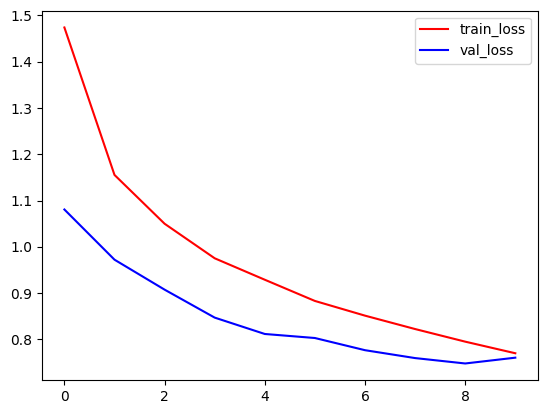

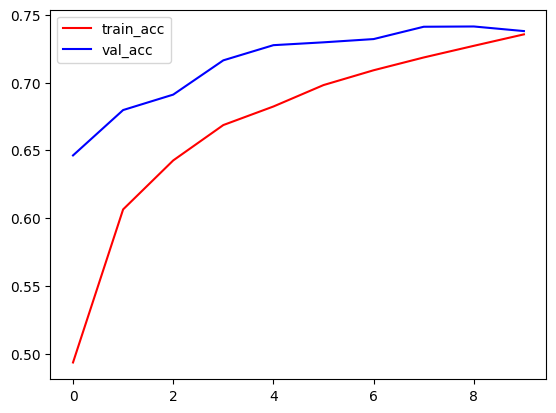

In [6]:
plt.plot(history.history['loss'], color="red", label="train_loss")
plt.plot(history.history['val_loss'], color="blue", label="val_loss")
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], color="red", label="train_acc")
plt.plot(history.history['val_accuracy'], color="blue", label="val_acc")
plt.legend()
plt.show()


In [8]:
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Load and preprocess test image
testimg = cv2.imread('/content/truck.jpeg')
testimg = cv2.resize(testimg, (224, 224))
testimg = testimg.astype("float32") / 255.0
testimg = np.expand_dims(testimg, axis=0)   # shape: (1,224,224,3)

# Prediction
pred = model.predict(testimg)
class_idx = np.argmax(pred)
confidence = np.max(pred) * 100

print(f"Predicted class: {class_names[class_idx]} ({confidence:.2f}% confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class: truck (99.98% confidence)
